In [193]:
from qutip import *
from qutip.measurement import measure, measurement_statistics
import numpy as np
import matplotlib.pyplot as plt


In [194]:
N=65
#cavity operators
ac = destroy(N)
xc = (ac+ac.dag())/np.sqrt(2)
pc = 1j*(ac.dag()-ac)/np.sqrt(2)
ic = qeye(N)
#qubit operators
aq = destroy(2)
xq = (aq+aq.dag())/np.sqrt(2)
pq = 1j*(aq.dag()-aq)/np.sqrt(2)
hq = (sigmax()+sigmaz())/np.sqrt(2)
iq = qeye(2)
g_proj = (iq+sigmaz())/2
e_proj = (iq-sigmaz())/2

# Experimental values

In [195]:
X_e0 = 2*np.pi*-93*10**3

X_f0 = 2*np.pi*-236*10**3

X_g0 = 0

# Full Parity Circuit

In [209]:
def ge_parity():
    chi = 1
    alpha = np.sqrt(2)
    nb_op = ac.dag()*ac

    H_int = X_e*tensor(e_proj, nb_op)
    H_parity = X_e*tensor(sigmaz(),nb_op)
    t = np.pi/(X_e)
    
    #error operators
    X_eg = X_e0-X_g0
    ge_relax = -X_eg*tensor(sigmap(), nb_op)
    
    # prepare cat state and initial state
    cat_state = (coherent(N,alpha)+coherent(N,-alpha)).unit()
    psi0 = tensor((basis(2,0)+basis(2,1)).unit(), cat_state)
    
    
    #Change options for solver
    new_options = Options()
    new_options.atol = 1e-05
    new_options.rtol = 1e-03
    new_options.nsteps = 10000
    new_options.normtol = 0.1
    
    print(new_options)
    #result = mesolve(H_int, psi0, np.linspace(0,t,100))
    result = mesolve(H_int, psi0, np.linspace(0,t,100), c_ops = [ge_relax], options = new_options)
    
    
    psi = result.states[-1]
    
    psi = tensor(hq,ic)*psi
    return psi

In [210]:
psi = ge_parity()

Options:
-----------
atol:              1e-05
rtol:              0.001
method:            adams
order:             12
nsteps:            10000
first_step:        0
min_step:          0
max_step:          0
tidy:              True
num_cpus:          8
norm_tol:          0.001
norm_steps:        5
rhs_filename:      None
rhs_reuse:         False
seeds:             0
rhs_with_state:    False
average_expect:    True
average_states:    False
ntraj:             500
store_states:      False
store_final_state: False

 ZVODE--  At T (=R1), too much accuracy requested  
       for precision of machine:   see TOLSF (=R2) 
      In above,  R1 = -0.2725773616980D-11   R2 =             Infinity


Exception: ODE integration error: Try to increase the allowed number of substeps by increasing the nsteps parameter in the Options class.

In [179]:
psi.ptrace(0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[9.99999999e-01+0.00000000e+00j 2.06863261e-05+3.58494502e-06j]
 [2.06863261e-05-3.58494502e-06j 1.04291669e-09+0.00000000e+00j]]

(<Figure size 800x600 with 1 Axes>,
 <AxesSubplot: xlabel='Fock number', ylabel='Occupation probability'>)

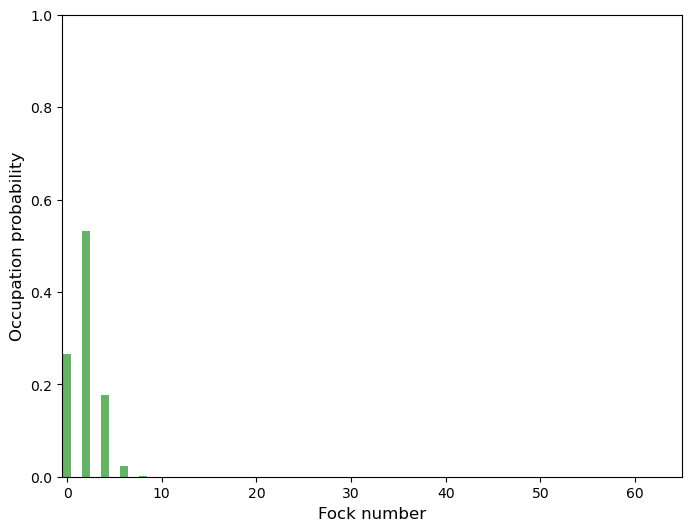

In [180]:
plot_fock_distribution(psi.ptrace(1))

(<Figure size 600x600 with 1 Axes>,
 <AxesSubplot: title={'center': 'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

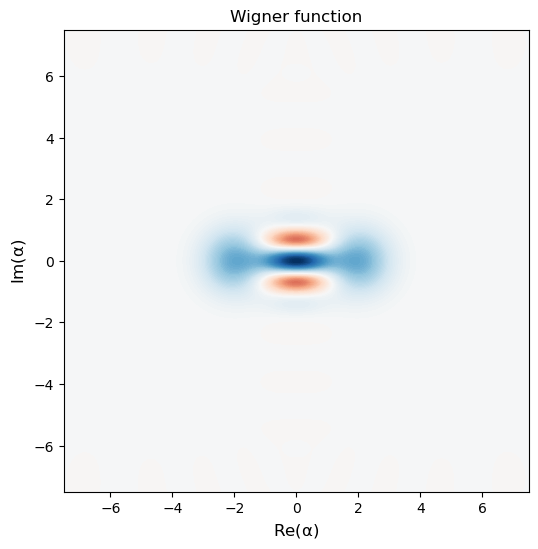

In [181]:
plot_wigner(psi.ptrace(1))

In [182]:
fidelity(ket2dm(cat_state),psi.ptrace(1))

1.0000032299328203